# Objetivo:

 - Encontrar o melhor algoritmo  para fazer a previsão do preço do carro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros_populares/main/3%20-%20EDA/carros_populares_filtrados.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          9161 non-null   object 
 1   modelo         9161 non-null   object 
 2   motor          9161 non-null   float64
 3   quilometragem  9161 non-null   float64
 4   ano            9161 non-null   int64  
 5   preco          9161 non-null   float64
 6   informacoes    9161 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 501.1+ KB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9161.0,1.66,0.48,1.0,1.4,1.6,2.0,4.0
quilometragem,9161.0,87948.85,46157.31,5000.0,49236.0,85888.0,120187.0,200000.0
ano,9161.0,2013.75,4.93,1973.0,2011.0,2014.0,2018.0,2021.0
preco,9161.0,50064.36,30792.26,6000.0,28870.0,41890.0,64990.0,199990.0


In [7]:
df.isna().sum()

marca            0
modelo           0
motor            0
quilometragem    0
ano              0
preco            0
informacoes      0
dtype: int64

In [8]:
dados = df

In [9]:
dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9161.0,1.66,0.48,1.0,1.4,1.6,2.0,4.0
quilometragem,9161.0,87948.85,46157.31,5000.0,49236.0,85888.0,120187.0,200000.0
ano,9161.0,2013.75,4.93,1973.0,2011.0,2014.0,2018.0,2021.0
preco,9161.0,50064.36,30792.26,6000.0,28870.0,41890.0,64990.0,199990.0


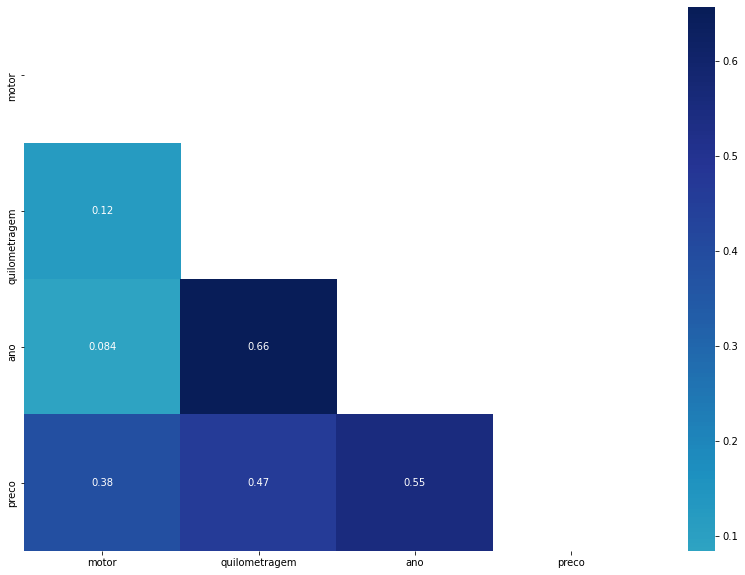

In [10]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e3d20f10>,
      dtype=object)

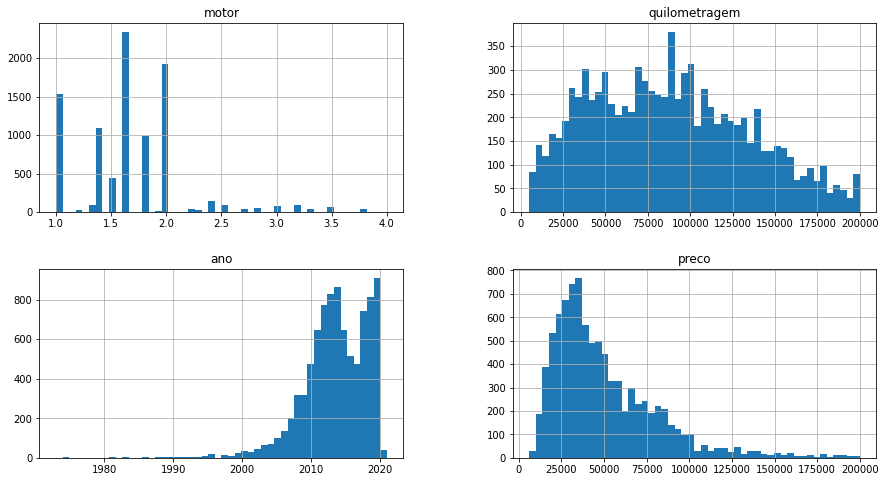

In [11]:
dados.hist(bins=50, figsize=(15,8))

## Definindo as amostras de treino e teste

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
enconder = LabelEncoder()

In [14]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

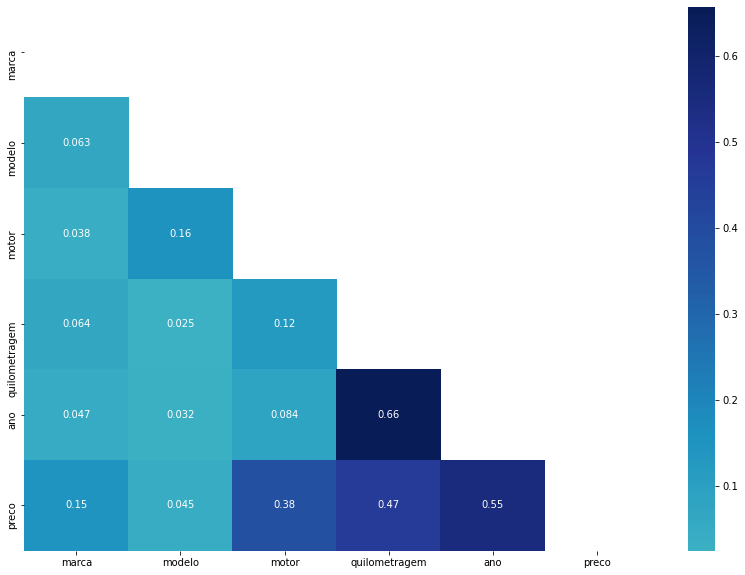

In [15]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

- Normalizando o preço.

In [16]:
dados['preco'] = dados['preco'].apply(np.log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4e2505110>,
      dtype=object)

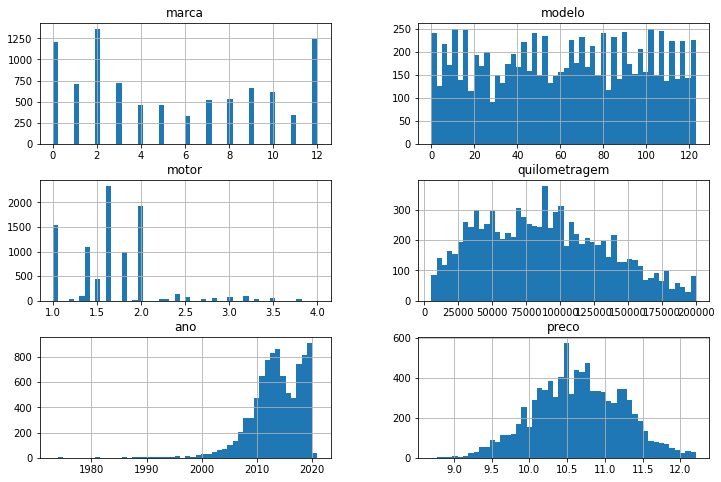

In [17]:
dados.hist(bins=50, figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


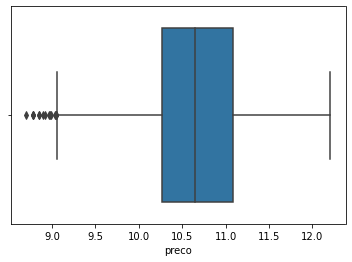

In [18]:
sns.boxplot(dados['preco'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [21]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

 - Modelo "Baseline" (Ponto de partida)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.6909139635901138

 - Machine learning

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9938293632112039
Test score 0.7586076097342249
Treinando RandomForestRegressor
Train score 0.9732952654320842
Test score 0.8467954218108216
Treinando MLPRegressor
Train score -17.66348218539783
Test score -17.522007534186177
Treinando XGBRegressor
[19:51:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.8165707685583343
Test score 0.8246790003622272


In [31]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', (val_score).mean())
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9938293632112039
Validation score 0.7167056483718752
Test score 0.7573421396457871
Treinando RandomForestRegressor
Train score 0.9732643481546152
Validation score 0.8323579090997473
Test score 0.844884888116396
Treinando MLPRegressor
Train score -20.027043788409042
Validation score -8.11351455519484
Test score -16.732746521389444
Treinando XGBRegressor
[20:05:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depre

## Gridsearch RandomForest

In [33]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', (val_score).mean())
print('Test score', test_score)

Train score 0.8920391390703544
Validation score 0.828483771030819
Test score 0.8451249588732979


 - Calculando  o erro.

In [34]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 0.1550
MSE = 0.0542
RMSE = 0.2328
R2 = 0.8451


## Salvando o modelo

In [ ]:
# import pickle
# # now you can save it to a file
# with open('randomforest_regression.pkl', 'wb') as f:
#     pickle.dump(reg, f)

# output = open('modelo_faturamento', 'wb')
# pickle.dump(reg, output)
# output.close()

#  abrindo o arquivo salvo

# modelo = open('modelo_faturamento', 'rb')
# new_model = pickle.load(modelo)
# modelo.close()

In [36]:
import pickle

output = open('modelo_precos', 'wb')
pickle.dump(reg, output)
output.close()